In [0]:
'''
Description: This program attempts to optimize a users portfolio using the Efficient Frontier & Python.

Portfolio optimization is the process of selecting the best portfolio (asset distribution),
out of the set of all portfolios being considered, according to some objective. The objective
typically maximizes factors such as expected return, and minimizes costs like financial risk.
-https://en.wikipedia.org/wiki/Portfolio_optimization 

Modern portfolio theory says that it is not enough to look at the expected risk and return of one 
particular stock. By investing in more than one stock, an investor can reap
the benefits of diversification — chief among them, a reduction in the riskiness of the portfolio.
-https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

The number of trading days in a year is about 252 or 253 depending on how you round (so these are the numbers that I will use in this program):
The number 253 was calculated from 365.25 (days on average per year) * 5/7 
(proportion work days per week) — 6 (weekday holidays) — 3*5/7 (fixed date holidays) = 252.75 ≈ 253.
In year 2020 there will be 252 trading days.

Resources:
1. pyportfolioopt : https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html
2. Robert Ansrew Martin (Creator of Pyportfolio) : https://reasonabledeviations.com/Projects/
3. The Sharpe Ratio YouTube: https://www.youtube.com/watch?v=50oyD_e8Vh0
4. Treasury Bills (Risk Free Asset): https://www.investopedia.com/terms/t/treasurybill.asp
5. The Sharpe Ratio : https://www.investopedia.com/articles/07/sharpe_ratio.asp
6. Calculating the Sharpe Ratio In Python : https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805
7. Efficient Frontier Portfolio Optimisation In Python : https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
8. log returns vs simple returns : https://fintechprofessor.com/tag/log-returns-vs-simple-returns/ 
9. What is a good Sharpe Ratio: https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp

'''

'\nDescription: This program attempts to optimize a users portfolio using the efficient frontier & Python.\n\nModern portfolio theory says that it is not enough to look at the expected risk and return of one \nparticular stock. By investing in more than one stock, an investor can reap\nthe benefits of diversification — chief among them, a reduction in the riskiness of the portfolio.\n-https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f\n\nThe number of trading days in a year is about 252 or 253 depending on how you round:\nThe number 253 was calculated from 365.25 (days on average per year) * 5/7 \n(proportion work days per week) — 6 (weekday holidays) — 3*5/7 (fixed date holidays) = 252.75 ≈ 253.\n\nResources:\n1. pyportfolioopt : https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html\n2. Robert Ansrew Martin (Creator of Pyportfolio) : https://reasonabledeviations.com/Projects/\n3. The Sharpe Ratio YouTube: https://www.youtube.com/wat

In [0]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Get the stock symbols/tickers in your portfolio, 
#FAANG
#FAANG is an acronym referring to the stocks of the five most popular and best-performing American 
#technology companies: 
#Facebook, Amazon, Apple, Netflix and Alphabet (formerly known as Google)
assets =  ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [0]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each 
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [0]:
#Get the stock starting date
stockStartDate = '2013-01-01'

# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [0]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()  
#Store the adjusted close price of stock into the dataframe
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo',
                               start=stockStartDate , end=today)['Adj Close']


In [0]:
#Show the dataframe
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.820526,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.931404,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.543602,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.719994,13.880000,365.280823
...,...,...,...,...,...
2020-03-09,169.500000,1800.609985,266.170013,346.489990,1215.560059
2020-03-10,178.190002,1891.819946,285.339996,364.130005,1280.390015
2020-03-11,170.240005,1820.859985,275.429993,349.920013,1215.410034


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


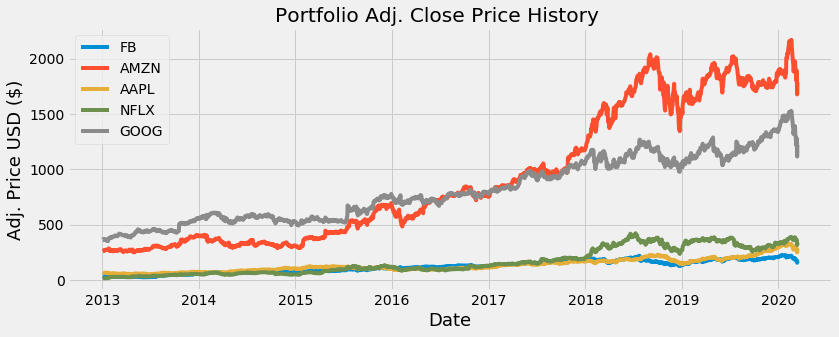

In [0]:
# Visually Show The Stock/Portfolio Price(s)

# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()


In [0]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1 
returns = df.pct_change()  
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-03-09,-0.064001,-0.052854,-0.079092,-0.060926,-0.063809
2020-03-10,0.051268,0.050655,0.072022,0.050911,0.053333
2020-03-11,-0.044615,-0.037509,-0.034731,-0.039025,-0.050750


In [0]:
#Create and show the annualized covariance matrix

# Covariance is a mathematical concept which is commonly used in statistics. 
# when comparing data samples from different populations, 
# covariance is used to determine how much two random variables vary or move together, 
# so it's the directional relationship between two asset prices

# The diagonal entries of the covariance matrix are the variances and the other entries are the covariances
# The covariance of two stocks tells you how likely they are to increase or decrease simultaneously.

# Variance is a statistical measure of how much a set of observations differ from each other.
# If you take the square root of variance then you get the volatility or standard deviation
#   e.g. sqrt(variance) = σ = volatility = standard deviation

# NOTE: Volatility is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.
#       Annualized daily covariance matrix is covalance matrix * approx. 252 trading days in a year

cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.109611,0.048688,0.033886,0.050926,0.041998
AMZN,0.048688,0.089034,0.031999,0.057688,0.043506
AAPL,0.033886,0.031999,0.069938,0.028193,0.030822
NFLX,0.050926,0.057688,0.028193,0.211284,0.045765
GOOG,0.041998,0.043506,0.030822,0.045765,0.058966


In [0]:
# Calculate the portfolio variance with the formula
# Formula for calculating portfolio variance: Weights transposed * (Covariance matrix * Weights)
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.054630886335622277

In [0]:
#Calculate the portfolio volatility / standard deviation

# The standard deviation aka volatility of a portfolio is the square root of its variance
# Formula for calculating portfolio volatility: 
# SQRT(variance)
# or 
# SQRT( Weights transposed * (Covariance matrix * Weights) )
port_volatility = np.sqrt(port_variance)
port_volatility

0.23373251022402142

In [0]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3201850376120795

In [0]:
#Show the expected annual return, volatility or risk, and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'

print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)


Expected annual return : 32.0%
Annual volatility/standard deviation/risk : 23.0%
Annual variance : 5.0%


In [0]:
pip install PyPortfolioOpt

     |████████████████████████████████| 952kB 8.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.0.28-cp36-cp36m-linux_x86_64.whl size=2114249 sha256=f30d40aebedaa4c80ea934531145d82a7041dd8b31712f7383ef87a30557de28
  Stored in directory: /root/.cache/pip/wheels/c0/39/27/b05cd1ca18445ed4b54c8fe7ecae57dae188cc55b7dd2bbfbf
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.25
    Uninstalling cvxpy-1.0.25:
      Successfully uninstalled cvxpy-1.0.25


In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [0]:
# Here is an example on the stock data, demonstrating how easy it is to find
# the long-only portfolio (A portfolio that holds only long positions on securities and no short positions)
# that maximises the Sharpe ratio (a measure of risk-adjusted returns).
#AKA Portfolio Optimization !

'''
In modern portfolio theory, the efficient frontier is an investment portfolio which occupies the 
'efficient' parts of the risk-return spectrum. Formally, it is the set of portfolios which satisfy 
the condition that no other portfolio exists with a higher expected return but with the same 
standard deviation of return.

The Sharpe ratio was developed by William F. Sharpe in 1966. The ratio describes 
how much excess return you receive for the extra volatility you endure for holding a riskier asset.
- Investopedia (https://www.investopedia.com/articles/07/sharpe_ratio.asp)

It measures the 
performance of an investment compared to a risk-free asset (bonds, treasury bills, etc.),
after adjusting for its risk. It is defined as the difference between the returns of the investment 
and the risk-free return, divided by the standard deviation of the investment. 
- Wikipedia (https://en.wikipedia.org/wiki/Sharpe_ratio)

A risk-free asset is one that has a certain future return—and virtually no possibility of loss.
Debt obligations issued by the U.S. Department of the Treasury (bonds, notes, and especially Treasury bills)
are considered to be risk-free because the "full faith and credit" of the U.S. government backs them.
- Investopedia (https://www.investopedia.com/terms/r/riskfreeasset.asp)

So what is considered a good Sharpe ratio that indicates a high degree of expected return 
for a relatively low amount of risk?

Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors.
A ratio higher than 2.0 is rated as very good.
A ratio of 3.0 or higher is considered excellent.
A ratio under 1.0 is considered sub-optimal.
- Investopedia (https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp)
'''

# Calculate expected returns and the annualised sample covariance matrix of (daily) asset returns.
mu = expected_returns.mean_historical_return(df) # returns.mean() * 252, NOTE: Mu is mean
S = risk_models.sample_cov(df) # Get the sample covariance matrix

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Create EfficientFrontier Object
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() #Helper method to clean the raw weights, setting any weights whose absolute values are below the cutoff to zero, and rounding the rest.
#ef.save_weights_to_file("weights.csv")  # save weights to file
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True) #Returns and shows the (Expected return, volatility, Sharpe ratio)

{'FB': 0.15791, 'AMZN': 0.23296, 'AAPL': 0.25573, 'NFLX': 0.35341, 'GOOG': 0.0}
Expected annual return: 37.6%
Annual volatility: 26.3%
Sharpe Ratio: 1.35


(0.37555169289622836, 0.26255866924979715, 1.3541799778012968)

In [0]:
pip install pulp

     |████████████████████████████████| 39.2MB 103kB/s 


In [0]:
#Get the discrete allocation of each share per stock
'''
PyPortfolioOpt also provides a method that will  allow you to change the allocated
weights to an actual amount that you can buy. 
Simply get the latest prices, and the desired portfolio amount ($15000 in this example)
'''

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FB': 14.0, 'AMZN': 2.0, 'AAPL': 13.0, 'NFLX': 16.0}
Funds remaining: $51.67
